# **NBHV G4360 Introduction to Theoretical Neuroscience**

# **Assignment 1 by Dongrui Deng UNI:dd3001**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

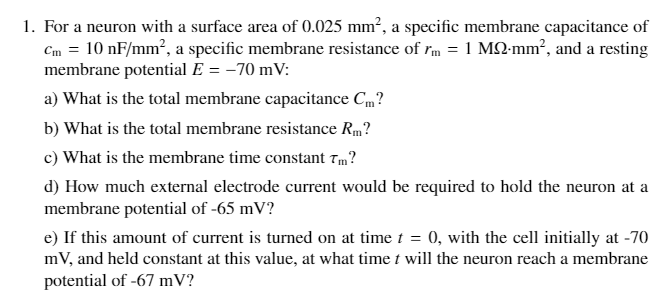

a) C_m = 0.25
b) R_m = 40.0
c) tau_m = 10
d) The required amount of external current is 0.125 .
e) Begin simulating the evolution of V along time t.


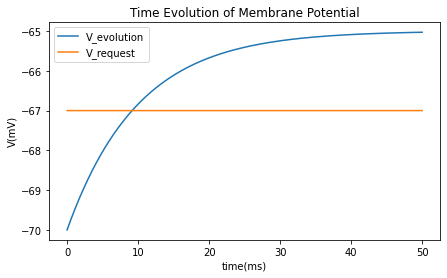

At time t= 9.16 [ms], the neuron will reach a membrane potential of -65mV.


In [ ]:
# Code for Solving the first Problem
# a) Calculate C_m
c_m = 10
A_m = 0.025
C_m = c_m * A_m
print("a) C_m =", C_m)

# b) Calculate R_m
r_m = 1
R_m = r_m / A_m
print("b) R_m =", R_m)

# c) Calculate tau_m
tau_m = c_m * r_m
print("c) tau_m =", tau_m)

# d) In order to HOLD the neuron at V = -65 mV,
# Condider the aymptotic situation dV/dt = 0
V = -65; E = -70
g_m = A_m / r_m
I_ext = g_m * (V - E)
print("d) The required amount of external current is", I_ext, ".")

# e) Begin considering soving tau_m * dV/dt = - V + V_inf
print("e) Begin simulating the evolution of V along time t.")
# Calculate V_infinity
V_inf = E + (r_m * I_ext) / A_m 
# Set up Simulation Time and Accuracy
duration = 50
dt = 0.01
# Use "Exponential Method" to solve the differential equation.
def Solve_ExpMethod (V=-70):
  V_s = []
  for i in range(int(duration/dt)):
    V = V_inf + (V - V_inf) * np.exp(-dt/tau_m)
    V_s.append(V)
  return V_s
# Plot Functions
V_s = Solve_ExpMethod()
t = np.arange(0, duration, dt)
V_request = -67 * np.ones(int(duration/dt))
plt.figure(figsize=(7,4))
plt.plot(t, V_s, label = "V_evolution")
plt.plot(t, V_request, label = "V_request")
plt.title('Time Evolution of Membrane Potential')
plt.xlabel('time(ms)')
plt.ylabel('V(mV)')
plt.legend()
plt.show()
# Find out the Solution
for i in range(int(duration/dt)):
  if V_s[i] < -67:
    continue
  else:
    print("At time t=", i * dt, "[ms], the neuron will reach a membrane potential of -65mV.")
    break
# e) Could be solved analytically as well.

Analytically solve e):

$\tau_m \frac{dV}{dt} = -V + V_∞$
$\Rightarrow V(t) = V_∞ + [V(0)-V_∞] · e^{-t/τ} $\
$\Rightarrow -67 = -65 + (-5) · e^{-t/τ} \Rightarrow 5e^{-t/10} = 2 \Rightarrow e^{-t/10} = \frac{2}{5} \Rightarrow -t/10 = ln(\frac{2}{5})$\
$\Rightarrow t = -10ln(\frac{2}{5})[ms] ≈ 9.16 ms$


**1.Electrical Properties of Neurons:**

a) $C_m = c_m · A_m = 0.25 nF$\
b) $R_m = r_m / A_m = 40 MΩ$\
c) $τ_m = c_m · r_m = 10 ^ {-2} s = 10 ms$\
d) Consider when $dV/dt = 0, 0 = -g_m(V - E) + I_{ext}$\
$I_{ext} = g_m · (V - E) = \frac{A_m}{r_m} · (V - E) = 0.125 nA$\
e) $t = 10 · -ln(2/5) [ms] ≈ 9.16 ms$  

***

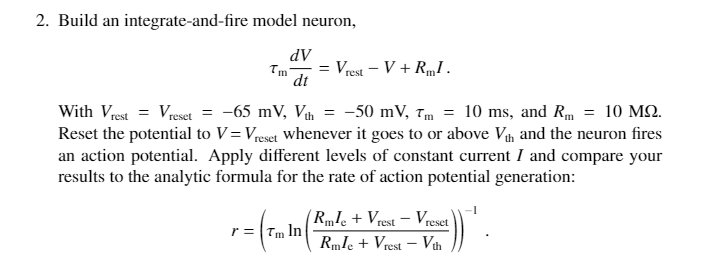

When Input Current = 2.0 nA
Simulated Solution for the Firing Rate is 0.07 kHz
Analytical Solution for the Firing Rate is 0.07213475204444816 kHz
When Input Current = 3.0 nA
Simulated Solution for the Firing Rate is 0.14 kHz
Analytical Solution for the Firing Rate is 0.14426950408889633 kHz
When Input Current = 4.0 nA
Simulated Solution for the Firing Rate is 0.21 kHz
Analytical Solution for the Firing Rate is 0.21276431452344433 kHz
When Input Current = 5.0 nA
Simulated Solution for the Firing Rate is 0.28 kHz
Analytical Solution for the Firing Rate is 0.2803673252057129 kHz


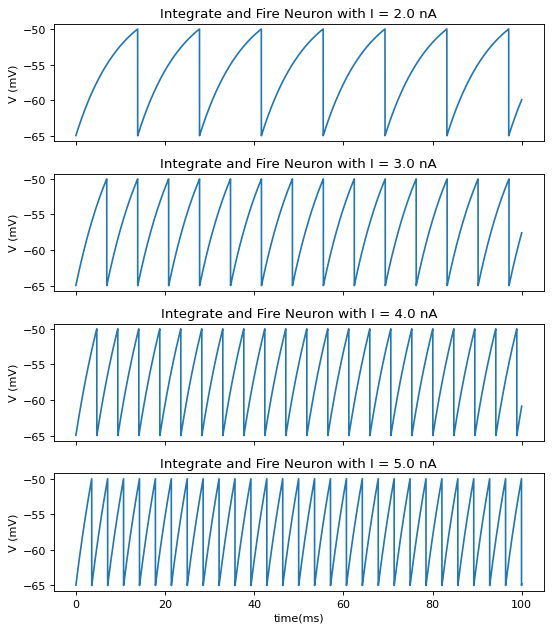

In [ ]:
# Input known data
V_reset = V_rest = -65
V_th = -50
tau_m = 10
R_m = 10

# Simulation Time and Precision 
duration = 100
dt = 0.01

# Set up the function for Integrate_and_Fire Model 
def Integrate_and_Fire(V = -65):
  V_s = []
  count = 0
  for i in range(int(duration/dt)):
    V = V_inf + (V - V_inf) * np.exp(-dt/tau_m)
    if V >= V_th:
      V = V_reset
      count = count + 1
    V_s.append(V)
  return V_s, count

# Plot Functions, Calculate Firing Rate and Compare with the Analytical Solution
fig, ax= plt.subplots(4, sharex=True,figsize=(7,8), dpi=80)
t = np.arange(0, duration, dt)
I = [2.0, 3.0, 4.0, 5.0]
for j in range(4):
  V_inf = V_rest + R_m * I[j]
  V_s, count = Integrate_and_Fire()
  # Calculate the Firing Rate
  rate_s = count / duration
  # Expression of Analytical Solution
  rate_a = 1 / ( tau_m * (np.log((V_inf - V_reset) / (V_inf - V_th))) )
  # Plot the Function
  ax[j].plot(t, V_s)
  ax[j].set_ylabel('V (mV)')
  # Show Results
  print("When Input Current =", I[j],"nA")
  print("Simulated Solution for the Firing Rate is", rate_s,"kHz" )
  print("Analytical Solution for the Firing Rate is", rate_a, "kHz")

# Plot Formatting
ax[0].set_title("Integrate and Fire Neuron with I = 2.0 nA")
ax[1].set_title("Integrate and Fire Neuron with I = 3.0 nA")
ax[2].set_title("Integrate and Fire Neuron with I = 4.0 nA")
ax[3].set_title("Integrate and Fire Neuron with I = 5.0 nA")
ax[3].set_xlabel('time(ms)')
plt.tight_layout()

<ipython-input-8-9892971e72df>:13: RuntimeWarning: invalid value encountered in log
  rate_a = 1 / ( tau_m * (np.log((V_inf - V_reset) / (V_inf - V_th))))


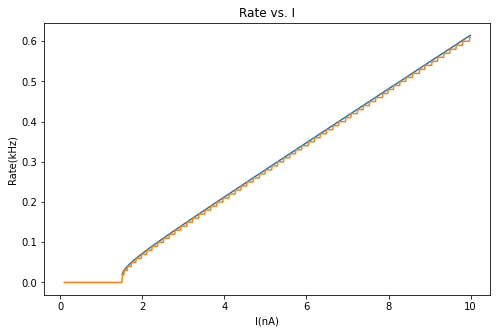

In [ ]:
# Plot Rate vs. I
I = np.arange(0.1, 10.0, 0.01)
Rate_A = []
Rate_S = []
for k in range(990):
  V_inf = V_rest + R_m * I[k]
  V_s, count = Integrate_and_Fire()
  # Calculate the Firing Rate
  rate_s = count / duration
  # Expression of Analytical Solution
  V_inf = V_rest + R_m * I[k]
  # It may take a longer time because of the existance of log
  rate_a = 1 / ( tau_m * (np.log((V_inf - V_reset) / (V_inf - V_th))))
  Rate_A.append(rate_a)
  Rate_S.append(rate_s)
print()
plt.figure(figsize=(8,5))
plt.plot(I, Rate_A)
plt.plot(I, Rate_S)
plt.xlabel('I(nA)')
plt.ylabel('Rate(kHz)')
plt.title('Rate vs. I')
plt.show()

**2.Integrate and Fire Model:** \
As we can see from the results above: \
When Input Current = 2.0 nA: \
Simulated Solution for the Firing Rate is **0.07** kHz$(ms^{-1})$ \
Analytical Solution for the Firing Rate is 0.07213475204444816 kHz \
When Input Current = 3.0 nA: \
Simulated Solution for the Firing Rate is **0.14** kHz \
Analytical Solution for the Firing Rate is 0.14426950408889633 kHz \
When Input Current = 4.0 nA: \
Simulated Solution for the Firing Rate is **0.21** kHz \
Analytical Solution for the Firing Rate is 0.21276431452344433 kHz \
When Input Current = 5.0 nA: \
Simulated Solution for the Firing Rate is **0.28** kHz \
Analytical Solution for the Firing Rate is 0.2803673252057129 kHz

In general, the simulated results **matched well** with the analytical solutions.\
However, since the simulated results of rates were calculated via counting 
spikes over a time interval and dividing by the duration of that interval,
if there were more spikes in that period of time, the simulation result was
going to be relatively more accurate and vice versa. \
Also, Choosing a longer simulated time will be beneficial to increase the accuracy of simulation. \
**Note:** The zigzag form in the last diagram is caused by the finity of the 
simulation duration.


***

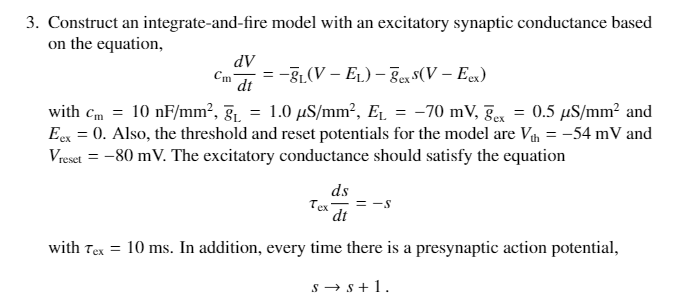

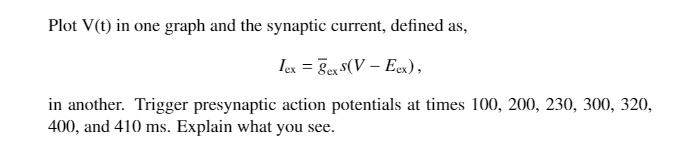

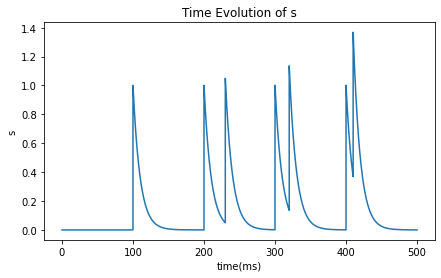

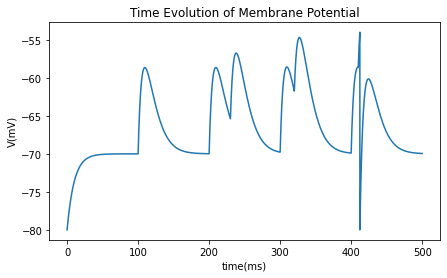

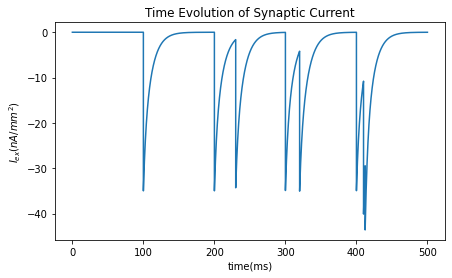

In [19]:
# Input known data
c_m = 10
g_L = 1.0
E_L = -70
g_ex = 0.5
E_ex = 0
V_th = -54
V_reset = -80
tau_ex = 10

# Simulation Time and Precision 
duration = 500
dt = 0.01

# Set up the function for Calculating s
# It is fine to set up S=[] and use append function to fill the array as well.
# I am practicing another form of coding here.
def Calculate_s():
  S = np.zeros(int(duration/dt))
  s_inf = 0
  for i in range(int(duration/dt)-1):
    S[i+1] = s_inf + (S[i] - s_inf) * np.exp(-dt/tau_ex)
    t = i * dt
    if t == 100 or t == 200 or t == 230 or t == 300 or t == 320 or t == 400 or t == 410:
      S[i+1] = S[i] + 1
  return S

# Plot Function s
S = Calculate_s()
t = np.arange(0, duration, dt)
plt.figure(figsize=(7,4))
plt.plot(t, S, label = "S_evolution")
plt.title('Time Evolution of s')
plt.xlabel('time(ms)')
plt.ylabel('s')
plt.show()

# Set up the function for Integrate_and_Fire Model with "Euler Method"
def Integrate_and_Fire(V = -80):
  V_s = []
  S = Calculate_s()
  I_ex = np.zeros(int(duration/dt))
  for i in range(int(duration/dt)):
    # Calculate I_ex
    I_ex[i] = g_ex * S[i] * (V - E_ex)
    # Calculate dV/dt
    dVdt = ((-g_L * (V - E_L)) - I_ex[i]) / c_m
    # Update V using Euler Method
    V = V + dVdt * dt
    if V >= V_th:
      V = V_reset
    V_s.append(V)
  return V_s, I_ex

# Plot functions V(t) and I_ex(t)
print()
V_s, I_ex = Integrate_and_Fire()
t = np.arange(0, duration, dt)
plt.figure(figsize=(7,4))
plt.plot(t, V_s, label = "V_evolution")
plt.title('Time Evolution of Membrane Potential')
plt.xlabel('time(ms)')
plt.ylabel('V(mV)')
plt.show()
print()
plt.figure(figsize=(7,4))
plt.plot(t, I_ex, label = "I_ex_evolution")
plt.title('Time Evolution of Synaptic Current')
plt.xlabel('time(ms)')
plt.ylabel('$I_{ex}(nA/mm^2)$')
plt.show()
print()

**3.Integrate-and-Fire Model with an Excitatory Synaptic Conductance:**

**Observation:** When two subsequent trigger presynapic action petenials get close together in terms of time, \
the larger value of s finally trigger the membrane potential to exceed the threshold causing the firing. \
**Note:** Synaptic Current is in unit of $nA/mm^2$ and is negative here.

***

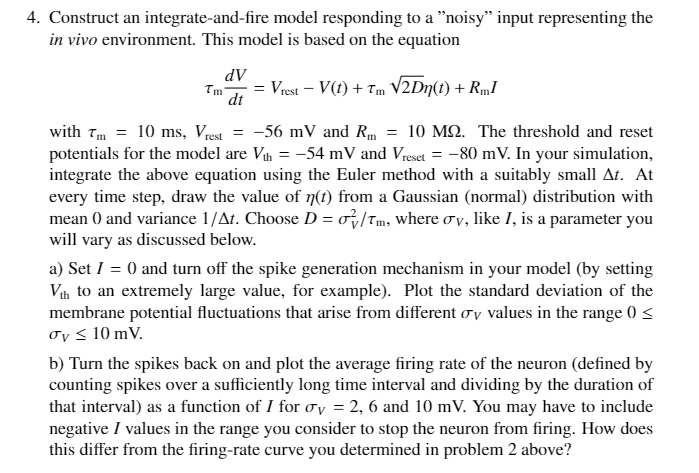

a) I = 0, no spike generation, sigma_v in range, plot std div of V fluctuations


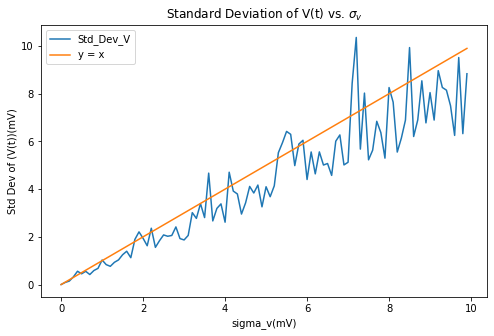

In [ ]:
# Input known data
tau_m = 10
V_rest = -56
R_m = 10
V_reset = -80

# Simulation Time and Precision 
duration = 100
dt = 0.01

# Question a)
print("a) I = 0, no spike generation, sigma_v in range, plot std div of V fluctuations")
V_th = 100
I = [0]
k = 0
sigma_v = np.arange(0, 10, 0.1)
D = (sigma_v ** 2) / tau_m

# Set up the function for Integrate_and_Fire Model with "Euler Method"
def Integrate_and_Fire(V = -56):
  V_s = []
  count = 0
  for i in range(int(duration/dt)):
    # Calculate dV/dt
    dVdt = (V_rest - V + (tau_m * ((2*D[j]) ** (1/2)) * Eta[i]) + (R_m * I[k])) / tau_m
    # Update V using Euler Method
    V = V + dVdt * dt
    if V >= V_th:
      V = V_reset
      count = count + 1
    V_s.append(V)
  return V_s, count

# Calculate the Standard Deviation of V(t)
Std_Dev_V = []
for j in range(int(10/0.1)):
  # Gaussian Noise 
  Eta = np.random.normal(0, (1/dt)**(1/2), int(duration/dt))
  V_s, count = Integrate_and_Fire()
  std_dev_V = np.std(V_s, axis=0)
  Std_Dev_V.append(std_dev_V)

# Plot functions V(t) and I_ex(t)
plt.figure(figsize=(8,5))
plt.plot(sigma_v, Std_Dev_V, label = 'Std_Dev_V')
plt.plot(sigma_v, sigma_v, label = 'y = x')
plt.title('Standard Deviation of V(t) vs. $\sigma_v$')
plt.xlabel('sigma_v(mV)')
plt.ylabel('Std Dev of (V(t))(mV)')
plt.legend()
plt.show()

b) V_th = -54, sigma_v = 2, 6, 10, plot rate vs. I


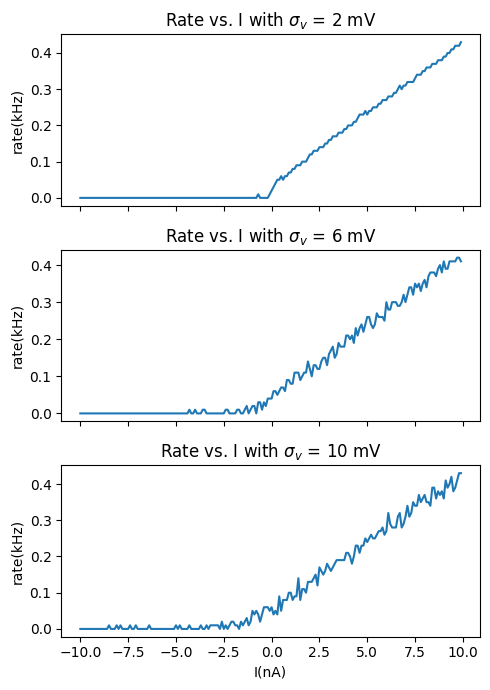

In [ ]:
# Question b)
print("b) V_th = -54, sigma_v = 2, 6, 10, plot rate vs. I")
V_th = -54
sigma_v = np.array([2, 6, 10])
D = (sigma_v ** 2) / tau_m
I = np.arange(-10, 10, 0.1)
fig, ax= plt.subplots(3, sharex=True,figsize=(5,7), dpi=100)
for j in range (3):
  rate = []
  for k in range (200):
    # Gaussian Noise 
    Eta = np.random.normal(0, (1/dt)**(1/2), int(duration/dt))
    V_s, count = Integrate_and_Fire()
    rate.append(count / duration)
  # Plot functions V(t) and I_ex(t)
  ax[j].plot(I, rate)
  ax[j].set_ylabel('rate(kHz)')  
ax[0].set_title("Rate vs. I with $\sigma_v$ = 2 mV")
ax[1].set_title("Rate vs. I with $\sigma_v$ = 6 mV")
ax[2].set_title("Rate vs. I with $\sigma_v$ = 10 mV")
ax[2].set_xlabel("I(nA)")
plt.tight_layout()

**4.Integrate and Fire Neuron responding to Noisy Input:**

1) With the $\sigma_v$: `sigma_V` growing larger, the noise / fluctuation of the rate(I) function **gets larger**. (As shown in the obtained figures above); \
2) The noise gives the neuron **other chances** to fire even in the condition that the input current is negative. This is because the noise can cause **fluctuations** of the membrane potential value and  when it reach the threshold, the neuron can fire. The larger the $\sigma_v$: `sigma_V` is, the **larger** the varience or standard deviation of action potential is, which indicates larger fluctuation of the membrane potential V, **easing** the neuron to fire. \
On the contrast, the neuron never fire when I is small or below 0 in the condition with no noise input.
(As shown in the figure from Problem 2)